## Clean version of post_pro_landau_rel for D=2

We use it and then move the results to Notes_log.

In [1]:
#using DifferentialEquations
using Plots
using Statistics
using FFTW
FFTW.set_provider!("mkl")
#import Pkg; Pkg.add("FileIO")
using FileIO
using JLD2
using Base.Threads
using Distributions
import Pkg; Pkg.add("LaTeXStrings")
using LaTeXStrings
using Printf
using LsqFit
using LinearAlgebra

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
const D = 2

2

In [3]:
include("aux_functions/aux_functions.jl")

plot_matrix

In [4]:
outputs = false # detailed output (no longer used)
average_outputs =false
full_outputs = true
animation = false # to run animations
phase_space_show = false #show phase space diagrams
phase_space_show = true
remote_server = false # if run in remote as a script avoid all plots 
save_plots = true # put true is you want so save your plots.
plots = true

true

We first introduce the name of the file with the data and retrieve the metadata.

In [8]:
#file_name = "Results/weibel_I2_Box_15.0x15.0_J_64x64_Ax_25_Th3_alp8tf_100_N6_M101_o5_B0_0_full.jld2"
#file_name = "Results/damped_I2_Box_7.455x1.0_J_930x100_Th3_alp2tf_100_N6_M10001_o5_B0_0_full.jld2"
#file_name = "Results/weibel_I2_Box_15.0x15.0_J_64x64_Ax_25_Th3_alp8tf_100_N6_M1001_o5_B0_0_full.jld2"
#file_name = "Results/weibel_I2_Box_15.0x15.0_J_64x64_Ax_25_Th3_alp8tf_1000_N6_M1001_o5_B0_0_full.jld2"
#file_name = "Results/weibel_I2_Box_15.0x15.0_J_64x64_Ax_25_Th3_alp8tf_10000_N6_M10001_o5_B0_0_full.jld2"
file_name = "Results/weibel_I2_Box_15.0x15.0_J_64x64_Ax_25_Th3_alp8tf_4000_N6_M10001_o5_B0_0_full.jld2"
file_name = "Results/weibel_I2_Box_15.0x15.0_J_64x64_Ax_25_Th3_alp8tf_4000_N7_M10001_o5_B0_0_full.jld2"

"Results/weibel_I2_Box_15.0x15.0_J_64x64_Ax_25_Th3_alp8tf_4000_N7_M10001_o5_B0_0_full.jld2"

In [9]:

data, run_name, par_grid, par_evolv, par_f, n0, xs, t_series = retrieve_meta_data_D(file_name)
@show run_name
@show par_grid
@show par_evolv
@show par_f
@show (N, J, Box_x, order) = par_grid
@show (t_i, t_f, M, M_g, dt) = par_evolv
#@show (θ, nm, k) = par_f

dT = dt*(M-1)/(M_g-1)


#freqs_space = L*rfftfreq(J, 1/dx)

M_last = M_g  # number of last data point saved. Otherwise use M_g
#freqs_time = fftshift(rfftfreq(M_last, 1/dT))
#freqs_time = rfftfreq(M_last, 1/dT)*2*π;

dx = differentials(Box_x,J)
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;

run_name = "weibel_I2_Box_15.0x15.0_J_64x64_Ax_25_Th3_alp8tf_4000_N7_M10001_o5_B0_0"
par_grid = (10000000, (64, 64), (0.0, 15.0, 0.0, 15.0), 5)


par_evolv = (0.0, 400.0, 10001, 201, 0.04)
par_f = 

((1.0e-8, [0.0, 0.0], (0.0, 15.0, 0.0, 15.0)), (0.001, 0.025, [0.5, 0.0], 0.007760848597927437, 2))
(N, J, Box_x, order) = par_grid = (10000000, (64, 64), (0.0, 15.0, 0.0, 15.0), 5)
(t_i, t_f, M, M_g, dt) = par_evolv = (0.0, 400.0, 10001, 201, 0.04)


In [ ]:
if false
f_test(t) = sin(2*π*5*t)
F_test = rfft(f_test.(t_series))
freqs_time_test = (rfftfreq(M_g, 1/dT));
Plots.scatter(freqs_time_test, (abs.(F_test)))
end

We can have data written out in full o in averaged format: In each case we use different functions. Data written in full has a `"full.jld2"` at the end, otherwise a `"ave.jld2"` is used.

For the full case we use:

```
v = retrieve_data_D(data, par_grid, par_evolv);
```
```
Energy_K, Energy_E, EField_T, p_T, Q_T, S_T, T = get_averages_threads_D(v,par_grid,par_evolv, par_f);
```

For the averaged case we use:

```
M_last = 1601 # number of iterations already completed. 

n_t, S_t, Efield_t, averages = retrieve_average_data_D(data, par_grid, par_evolv;M_last=M_last);

Energy_E,  Energy_K, EField_T, p_T, Q_T, S_T, T = averages;
```



In [12]:
Step = 1
M_last = 20 #M_g  # number of last data point saved. Otherwise use M_g

if average_outputs
n_t, S_t, Efield_t, averages = retrieve_average_data_D(data, par_grid, par_evolv;M_last=M_last);

Energy_E,  Energy_K, EField_T, p_T, Q_T, S_T, T = averages;

elseif full_outputs
    v = retrieve_data_D(data, par_grid, par_evolv; M_last=M_last, Step=Step);
end

40012288×20 Matrix{Float64}:
  7.96668       8.05213       8.14021      …   9.5301        9.61452
 12.0407       12.0069       11.9742          11.4688       11.4365
  0.044503      0.0423143     0.04599          0.0434412     0.0409717
 -0.0169004    -0.0166754    -0.016071        -0.0168121    -0.0159367
 14.5289       14.609        14.687            0.930467      1.00687
  6.41968       6.58522       6.74942      …   9.41139       9.58447
  0.0394182     0.040245      0.0381323        0.0377707     0.0401383
  0.0833847     0.0828048     0.0821821        0.0863915     0.0853392
 10.1208       10.1694       10.2231          11.1217       11.1834
  2.86587       3.05104       3.23693          6.16227       6.34341
  ⋮                                        ⋱                
 -0.00127999   -0.0010115     0.000495805     -0.000312144   0.000458156
 -0.00203807    0.000540464   0.00180667   …  -0.000309007  -0.00250512
  0.0           8.24384e-5    4.74688e-5       0.000156677   0.000254

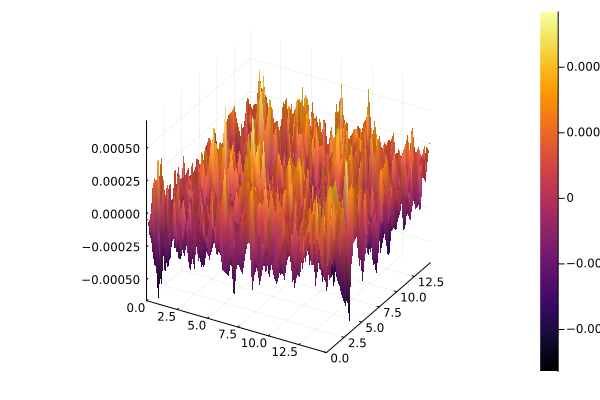

In [13]:
j = M_last÷Step
Fuj = view(v[:,j],4N+1:4N+3*prod(J))

Fj = reshape(Fuj,3,J...)

#F = view(u[4N+1:end],3,J...)
Ej = Fj[1:2,:,:]
Bj = Fj[3,:,:];

#surface(y_p,x_p,Ej[2,:,:])
surface(y_p,x_p,Bj[:,:].-0.0)

#norm(Bj)

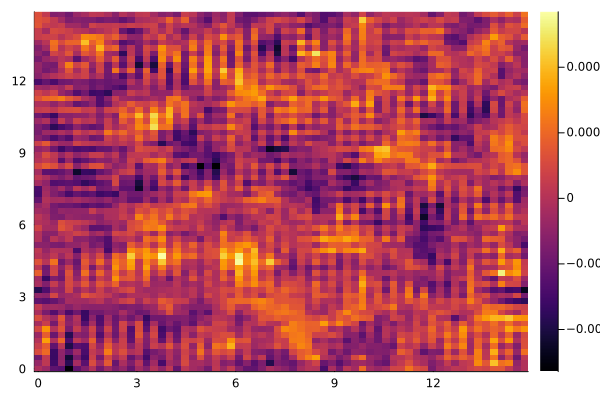

In [14]:
heatmap(y_p,x_p,Bj[:,:].-0.0)
#png("Notes/Weibel/heat_map_B_f_250_100")

In [15]:
include("aux_functions/aux_functions.jl")
M_r = (M_last-1)÷Step+1
E_E = zeros(M_r)
E_K = zeros(M_r)
for j in 1:M_r
E_K[j], E_E[j]  = get_energy_rel(v[:,j],(Box_x, N, J))
end

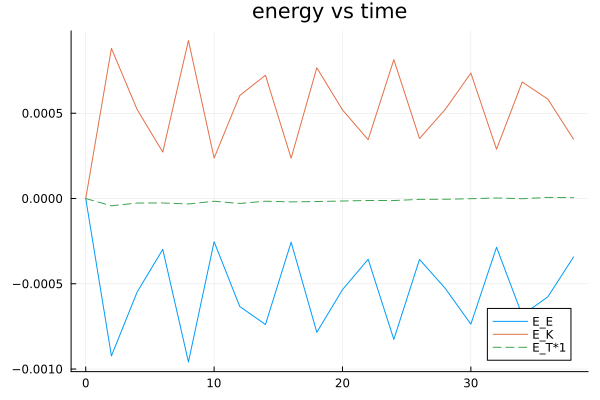

In [16]:

factor = 1
A = 1 #2.60 #7.45
plot(title="energy vs time")
plot!(t_series[1:Step:M_last],A*E_E .-A*E_E[1],label="E_E")
plot!(t_series[1:Step:M_last],E_K .-E_K[1],label="E_K")
plot!(t_series[1:Step:M_last],factor*(A*E_E + E_K .- (A*E_E[1]+E_K[1])), ls=:dash, label="E_T*$(factor)")
#png("Notes/Weibel/energy_vs_time_I2_N6_LL_64^2_15^2_101")
#png("Notes/Landau/energy_vs_time_I2_N6-damped-15")

In [ ]:
A = (E_K[end] - E_K[1])/(E_E[end] - E_E[1]) 

In [ ]:
@. EE_model(t,p) = p[1] + p[2]*cos(p[3]*t + p[4])^2*exp(-p[5]*t)
EE_fit = curve_fit(EE_model, t_series[1:Step:M_last], E_E, [E_E[1], 1e-5, 1, 0.0, 0.0])

In [ ]:
Plots.scatter(t_series[1:Step:M_last],E_E,label="E_E", markersize=1)
plot!(t_series[1:Step:M_last],EE_model(t_series[1:Step:M_last],EE_fit.param),label="fit", marker_size=1)

In [ ]:
EE_fit.param

In [ ]:
j = M_r
l = 1
P = 20
plot(legend=false)
#plot()
for j in 1:M_r
    Fuj = view(v[:,j],4N+1:4N+3*prod(J))
    Fj = reshape(Fuj,3,J...)
    Ej = Fj[1:2,:,:]
    Bj = Fj[3,:,:];
    plot!(y_p,Ej[l,:,P], label="E($l)")
    plot!(y_p,Bj[:,P].-0.0, label="B-1")
end
plot!()

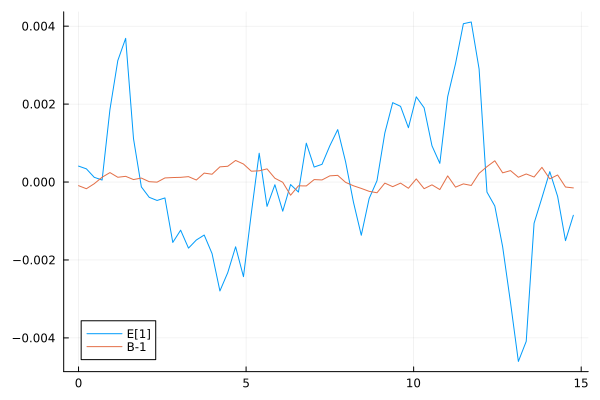

In [17]:
l = 1
P = 25
#plot(legend=false)
plot()
j = M_r
Fuj = view(v[:,j],4N+1:4N+3*prod(J))
Fj = reshape(Fuj,3,J...)
Ej = Fj[1:2,:,:]
Bj = Fj[3,:,:];
plot!(y_p,Ej[l,:,P], label="E[$l]")
#png("E_field_M_g")
plot!(y_p,Bj[:,P].-0.0, label="B-1")
#png("Notes/Weibel/E_B_field_M_g_N6_long")
    

In [ ]:
get_density_2D_trans = Density2DTrans(N, J)
get_current_2D_trans = Current2DTrans(N, J)


In [ ]:
nf = get_density_2D_trans(Val(order), Box_x, v[1:2D*N,M_r])
ρf = nf .-1.0;
@show sum(nf)/prod(J)
S = get_current_2D_trans(Val(order), Box_x, v[1:2D*N,M_r] )
@show sum(S[:,:,1]/prod(J))

### Constraint check

In [ ]:
Fuj = view(v[:,M_r],4N+1:4N+3*prod(J))
Fj = reshape(Fuj,3,J...)
Ej = Fj[1:2,:,:]
Err = 0.0
Max = 0.0
r0 = 0.2
M_test = 1000
x0=zeros(M_test,D)
err = zeros(M_test)
rho = zeros(M_test)
erab = zeros(M_test)
diV = zeros(M_test)
for i in 1:M_test
    x0[i,:]=[Box_x[1] + (Box_x[2]-Box_x[1])*rand(), Box_x[3] + (Box_x[4]-Box_x[3])*rand()]
    diV[i], rho[i], err[i], erab[i] = constraint_test(Ej, ρf, J, Box_x, ϕ_test, ∇ϕ_test, (x0[i,:], r0, 6))
    global Err = Err + abs(err[i])
    if err[i] > Max
        @show Max = err[i]
        @show x0[i,:]
    end
end
println("error = $(Err/M_test)")
println("Max = $(Max)")

In [ ]:

p1 = Plots.scatter(x0[:,1],x0[:,2],marker_z=-err[:], markersize=10, alpha=0.1, label="-err", aspectratio=1)
p2 = Plots.scatter(x0[:,1],x0[:,2],marker_z=-1.0./abs.(rho[:])./100, markersize=3, alpha=1, label="rho", aspectratio=1)
p3 = Plots.scatter(x0[:,1],x0[:,2],marker_z=-erab[:], markersize=10, alpha=0.1, label="erab", aspectratio=1)
plot(p1,p2,p3, layout = (2, 2))

#png("Notes/Weibel/div_error_test_L_$(M_test)_$(r0)_$(order)_$(N)_$(J[1])_$(J[2])_$(M_last)")

In [ ]:
println("error = $(Err/M_test)")
println("Max = $(Max)")

In [ ]:
Err/M_test

In [ ]:
Max

In [ ]:
histogram(err)
#png("Notes/Weibel/error-histogram_N6_$(M_test)_$(r0)_$(order)_$(N)_$(J[1])_$(J[2])_$(M_last)")

## Temperature

In [ ]:
T = [get_temperature_rel_D(v[1:2D*N,j],N,D) for j in 1:M_last]
plot(t_series[1:M_last],T, label="T")
#png("Notes/Weibel/Temperature_N6_T100_$(M_test)_$(r0)_$(order)_$(N)_$(J[1])_$(J[2])_$(M_last)")

In [ ]:
plot(histogram2d(v[1:2D:2D*N-3,j],v[2:2D:2D*N-2,j], title="space distribution" ))
#png("Notes/Weibel/final_space_distribution_N6_short_$(M_test)_$(r0)_$(order)_$(J[1])_$(J[2])_$(M_last)")
#png("Notes/Landau/final_space_distribution_N6-damped-15")

In [ ]:
j = M_last
plot(histogram2d(v[3:4:2D*N-1,j],v[4:4:2D*N,j] )
,aspectratio=1
,title = "momentum histogram at j = $j, t = $(t_series[j])"
)
#png("Notes/Weibel/momentum_histogram-N6_short_$(order)_$(J[1])_$(J[2])_$(M_last) ")
#png("Notes/Landau/momentum_histogram-j-$(j)_N6-damped-15")

### Momentum Rotation

To meassure the momentum rotation we look at 

$$
\theta_m = \frac{<|p_x|>}{\sqrt{<|p_x|>^2+<|p_y|>^2}}
$$

In [ ]:
θ_m = zeros(M_last)
B0=1



for j in 1:M_last
    θ_m[j] = get_theta_x(N, v[1:4N,j], Val(2))
end


In [ ]:

#@. θ_mod(t,p) = p[1] + (p[2] + p[4]*t)*cos(p[3]*t)^2
@. θ_mod(t,p) = p[1] + (p[2] + p[4]*t)*cos(p[3]*t)^2  
#@. θ_mod(t,p) = 0.705 + 0.021*cos(1.9795*t) + p[4]*cos(p[5]*t+p[6])

Nmax = M_last
θ_fit = curve_fit(θ_mod, t_series[1:Nmax], θ_m[1:Nmax], [0.68, 0.03, 0.0, 0.01,2.30,0.0]) 
Plots.scatter(t_series[1:M_last],θ_m, markersize=1.0)
plot!(t_series[1:M_last],θ_mod(t_series[1:M_last],θ_fit.param))
#png("Notes/Weibel/theta_fit_N6.png",)


In [ ]:
θ_fit.param

### Current

In [ ]:
plot_matrix(S[:,:,2])

In [ ]:
#plot of y,p_y
plot(histogram2d(v[2:2D:2D*N-2,j],v[4:2D:2D*N,j], title="phase space in y distribution" ))
#png("Notes/Weibel/final_y_py_distribution_N7")
#png("Notes/Landau/final_y_py_distribution_N6-damped-15")

In [ ]:
#plot of x,p_x
plot(histogram2d(v[1:2D:2D*N-3,j],v[3:2D:2D*N-1,j], title="phase space in x distribution" ))
#png("Notes/Weibel/final_x_px_distribution_N7")
#png("Notes/Landau/final_x_px_distribution_N6-damped-15")

In [ ]:
j=M_last
Plots.scatter(v[2:2D:2D*N-2,j],v[4:2D:2D*N,j], markersize=0.1)
png("Notes/Weibel/y_phase_space_N6_T400_$(order)_$(J[1])_$(J[2])_$(M_last)")
#png("Notes/Landau/y_phase_space_N6-damped-15")

In [ ]:
@show vxmp = sum(abs.(v[3:2D:2D*N-1,j]))/N


In [ ]:
yy = []
vy = []
for i in 1:N
    if v[i*2D-D+1,j] > vxmp
        push!(yy, v[i*2D-D+2,j])
        push!(vy, v[(i-1)*2D+2,j])
    end
end
plot(title="y phase space", legend=false)
Plots.scatter(yy,vy, markersize=0.1)

png("Notes/Weibel/y_phase_space_large_vx_N6_T400_$(order)_$(J[1])_$(J[2])_$(M_last)")
#png("Notes/Landau/y_phase_space_large_vx")

## Averaged section

In [ ]:

plot_averages(averages, t_series[1:M_last], N, run_name, save_plots)

In [ ]:
C_i = 0.060145630933730654 + 0.31190415932386045im

Plots.scatter(t_series[1:M_last],E_mode[1:M_last], markersize=1)
@. model_mode(x,p) = abs(real((p[1]+im*p[2])*exp(im*(p[3]+im*p[4])*x)))
N_i = 10
N_f = M_last
pm = [real.(C_i); imag.(C_i);1.1; 0.10]
#model_mode(2,pm)
fit_E_mode = curve_fit(model_mode, t_series[N_i:N_f], E_mode[N_i:N_f], pm);
plot!(t_series[N_i:N_f], model_mode(t_series[N_i:N_f],fit_E_mode.param))
#fit_E_mode.param
if save_plots
    png("Images/" * run_name * "_single_mode_fit.png")
end

In [ ]:
fit_E_mode.param

#### Energy fit 

In [ ]:
plot_energies(Energy_K, Energy_E, t_series[1:M_last], run_name, save_plots)

In [ ]:
@. model_e1(x,p) =  p[1] + p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x)
@. model_e2(x,p) = p[1] + p[2]*(cos(p[3]*x + p[4])^2 - p[6])*exp(-p[5]*x)
@. model_e3(x,p) = p[1] + (p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x))^2

pe_1 = [0.00001; 0.0001; 2; 0; 0.002; 0.00001; 2; 0; 0.0]
pe_2 = [0.0001; -0.0001; 1; 0; 0.000; 0.5]

#pe = [0.001; 0.001; 2.03; 2; 0.002; 0.001; 3.0; 0.0; 0.0]
#pe = [0.01; -0.01; 1; 0; 0.002; 0.0]
pe_3 = [0.00001; 0.001; 1.0; 2; 0.000; 0.001; 1.002; 0.0; 0.000]
#pe_3 = fit_e.param
fit_e, plt = energy_fit(t_series, Energy_E, model_e2, pe_2, 10, M_last, run_name, save_plots, yscale=:identity)
plt 

In [ ]:
fit_e.param

#### Temperature Fit

In [ ]:
N_i = 1
N_f = M_last
p_tl001 = [0.001; 0.001; 2.02; 0; 0.0; 0.; 2.0; 0; 0]
fit_T_1, plt = temperature_fit(t_series, T, p_tl001, N_i, N_f, run_name, save_plots)
plt

In [ ]:
#model_tl001(x,p) = p[1] + p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x)
fit_T_1.param

In [ ]:
ΔT = T .- sum(T)/length(T)
T_F = rfft(ΔT)
Plots.scatter(freqs_time,abs.((T_F)), title = " Temperature Spectrum", label="abs.(T_F)",legend=:topleft
, xticks=1.9:0.05:2.3, xlim=(1.9,2.3)
)
#=
Plots.scatter(abs.((T_F)), title = "Spectrum", label="abs.(T_F)",legend=:topleft
    , xticks=100:1:200, xlim=(120,140)
    )
    =#

    if save_plots
        png("Images/" * run_name * "_temperature_spectrum.png")
    end

In [ ]:
plot(ΔT)

In [ ]:
N_i = 1
N_f = M_last
p_tl001 = [0.00; 0.001; 2.02; 0; 0.0; 0.; 2.0; 0; 0]
fit_ΔT_1, plt = temperature_fit(t_series, T, p_tl001, N_i, N_f, run_name, save_plots)
plt

In [ ]:
fit_ΔT_1.param

#### Density study

In [ ]:
plot(n_t[:,M_last])

In [ ]:
n_F = rfft(n_t[:,M_last].-1); # we take out the background
#n_F = rfft(n_t[:,1].-1); # we take out the background

In [ ]:
Plots.scatter(freqs_space,abs.((n_F)), title = "Density Spectrum", label="abs.(n_F)",legend=:topleft
    , xticks=0:0.2:6
    , xlim=(0,6)
    )
    #recall that it is shifted one position to the right, so the frequency is 20.

In [ ]:
3/2*0.1^2

In [ ]:
2.012904971545909/2

In [ ]:
2.0033087748744984/2

